# Scientific Computing with Python
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />This notebook by Xiaozhou Li is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  
All code examples are also licensed under the [MIT license](http://opensource.org/licenses/MIT).

In [1]:
# what is this line all about?
%matplotlib inline
import matplotlib.pyplot as plt

## Numpy and Scipy
### Introduction
The numpy package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good.

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. 

### Fitting to polynomial

In [2]:
import numpy as np

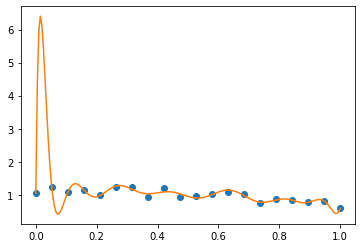

In [3]:
np.random.seed(12)

x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 16))

t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()

### Fit in a Chebyshev basis

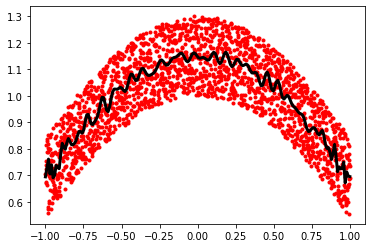

In [4]:
np.random.seed(0)

x = np.linspace(-1, 1, 2000)
y = np.cos(x) + 0.3*np.random.rand(2000)
p = np.polynomial.Chebyshev.fit(x, y, 90)

t = np.linspace(-1, 1, 200)
plt.plot(x, y, 'r.')
plt.plot(t, p(t), 'k-', lw=3)
plt.show()

### A demo of 1D interpolation

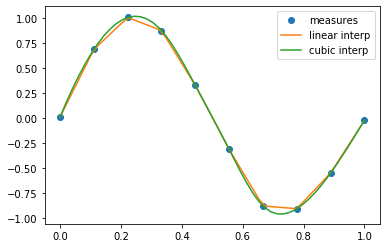

In [5]:
np.random.seed(0)
measured_time = np.linspace(0, 1, 10)
noise = 1e-1 * (np.random.random(10)*2 - 1)
measures = np.sin(2 * np.pi * measured_time) + noise

# Interpolate it to new time points
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

### Minima and roots of a function
\begin{equation}
    f(x) = x^2 + 10\sin(x)
\end{equation}

**(1) find minima**

In [6]:
def f(x):
    return x**2 + 10*np.sin(x)

from scipy import optimize

# Global optimization
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid, ))
print("Global minima found %s" % xmin_global)

# Constrain optimization
xmin_local = optimize.fminbound(f, 0, 10)
print("Local minimum found %s" % xmin_local)

Global minima found [-1.30641113]
Local minimum found 3.8374671194983834


**(2) root finding**

In [7]:
root = optimize.root(f, 1)  # our initial guess is 1
print("First root found %s" % root.x)
root2 = optimize.root(f, -2.5)
print("Second root found %s" % root2.x)

First root found [0.]
Second root found [-2.47948183]


**(3) Plot function, minima, and roots**

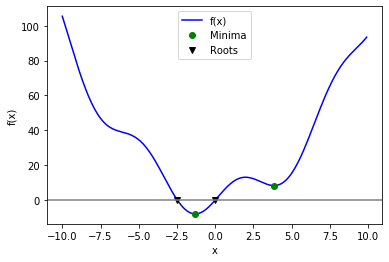

In [8]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

x = np.arange(-10, 10, 0.1)
# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")

# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")

# Plot the roots
roots = np.array([root.x, root2.x])
ax.plot(roots, f(roots), 'kv', label="Roots")

# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')
plt.show()

## Matplotlib
### Introduction
Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures.

### Reading and writing a panda

**(1) original figure**

(683, 1024, 3)


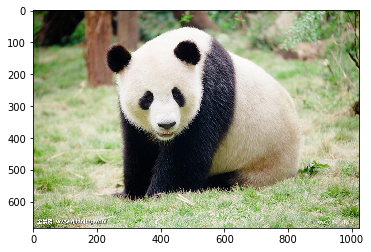

In [64]:
plt.figure()
img = plt.imread('../data/panda.jpg')
plt.imshow(img)
plt.imsave("original.jpg",img)

print (np.shape(img))

**(2) red channel displayed in grey**

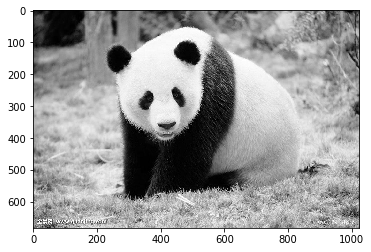

In [10]:
plt.figure()
img_red = img[:, :, 0]
plt.imshow(img_red, cmap=plt.cm.gray)

**(3) lower resolution (compression)**

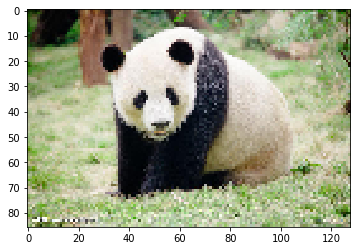

In [11]:
plt.figure()
img_tiny = img[::8, ::8]
plt.imshow(img_tiny, interpolation='nearest') 
#plt.savefig("compressed.jpg")
plt.imsave("compressed.jpg",img_tiny)

### Mandlebrot Set (Mandelbrot fractal)

/Users/xiaozhouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
/Users/xiaozhouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in square
  if sys.path[0] == '':
/Users/xiaozhouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


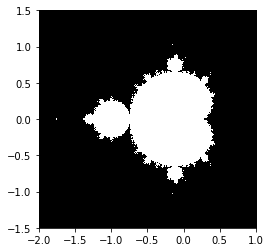

In [12]:
def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:,np.newaxis] + 1j*y[np.newaxis,:]

    # Mandelbrot iteration

    z = c
    for j in range(N_max):
        z = z**2 + c

    mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set

mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.show()

### A simple example of 3D plotting
$$ z = \sin(\sqrt{x^2 + y^2}) $$

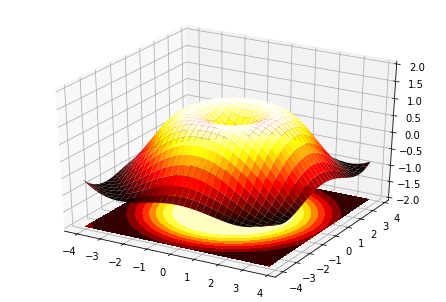

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)

plt.show()

### An example displaying the contours of a function
$$ f(x,y) = \left(1 - \frac{x}{2} + x^5 + y^3\right)e^{-x^2-y^2}.$$

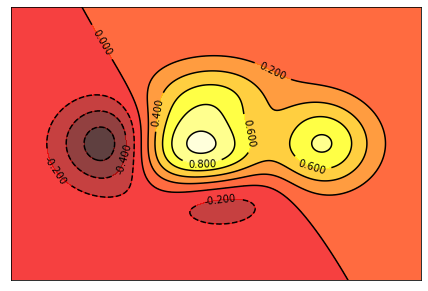

In [14]:
def f(x,y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X, Y), 8, colors='black')
plt.clabel(C, inline=1, fontsize=10)

plt.xticks(())
plt.yticks(())
plt.show()

## Sympy - Symbolic algebra in Python

### Introduction
There are two notable Computer Algebra Systems (CAS) for Python:

* [SymPy](http://sympy.org/en/index.html) - A python module that can be used in any Python program, or in an IPython session, that provides powerful CAS features. 
* [Sage](http://www.sagemath.org/) - Sage is a full-featured and very powerful CAS enviroment that aims to provide an open source system that competes with Mathematica and Maple. Sage is not a regular Python module, but rather a CAS environment that uses Python as its programming language.

Sage is in some aspects more powerful than SymPy, but both offer very comprehensive CAS functionality. The advantage of SymPy is that it is a regular Python module and integrates well with the Jupyter notebook. 

In [15]:
from sympy import *

init_printing()

### Expand, factor and simplify

In [16]:
x, y = symbols('x y')

(x+1)*(x+2)*(x+3)*(x+4)*(x+5)

In [17]:
expand((x+1)*(x+2)*(x+3)*(x+4)*(x+5))

In [18]:
sin(x+y)

In [19]:
expand(sin(x+y), trig=True)

In [20]:
expand((x+y)**8)

In [21]:
x**3 + 6 * x**2 + 11*x + 6

In [22]:
factor(x**3 + 6 * x**2 + 11*x + 6)

In [23]:
sin(x)**2 + cos(x)**2

In [24]:
simplify(sin(x)**2 + cos(x)**2)

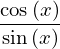

In [25]:
cos(x)/sin(x)

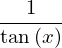

In [26]:
simplify(cos(x)/sin(x))

### Calculus
**(1) differentiation and integration**

$f(x) = (x+1)^2$

In [27]:
f = (x+1)**2
f

Computing $\frac{d f}{dx}$, $\frac{d f^2}{dx}$

In [28]:
diff(f,x)

In [29]:
diff(f**2,x)

Computing $\frac{d \sin(f)}{dx}$, $\frac{d^2 \sin(f)}{dx^2}$

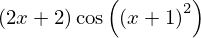

In [30]:
diff(sin(f),x)

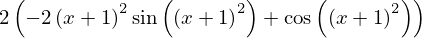

In [31]:
diff(sin(f),x,2)

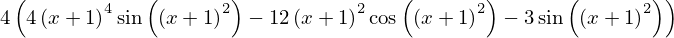

In [32]:
diff(sin(f),x,4)

$$ f(x,y) = \sin(xy) + \cos(xy),$$
computing
$$ \frac{\partial^3 f}{\partial x \partial y^2},\quad \int f(x,y)\,dx,\quad \int_{-1}^{1}f(x,y)\,dx$$

In [33]:
f = sin(x*y) + cos(y*x)
f

In [34]:
diff(f, x, 1, y, 2)

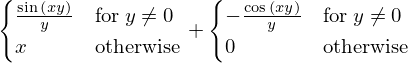

In [35]:
integrate(f, x)

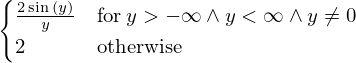

In [36]:
integrate(f, (x, -1, 1))

Computing $\int_{-\infty}^\infty e^{-x^2}\,dx$

In [37]:
integrate(exp(-x**2), (x, -oo, oo))

**(2) limits**
$$ \lim\limits_{x\rightarrow 0}\frac{\sin(x)}{x},\quad \lim\limits_{x\rightarrow 0^{+}}\frac{1}{x},\quad \lim\limits_{x\rightarrow 0^{-}}\frac{1}{x}$$

In [38]:
limit(sin(x)/x, x, 0)

In [39]:
limit(1/x, x, 0, dir="+")

In [40]:
limit(1/x, x, 0, dir="-")

**(3) series**

In [41]:
exp(x)

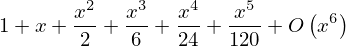

In [42]:
series(exp(x), x)

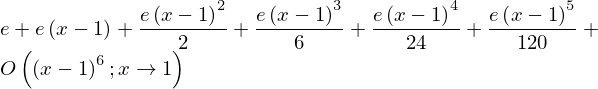

In [43]:
series(exp(x), x, 1)

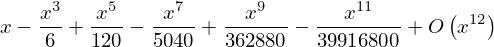

In [44]:
series(sin(x), x, 0, 12)

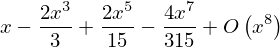

In [45]:
series(sin(x)*cos(x), x, 0, 8)

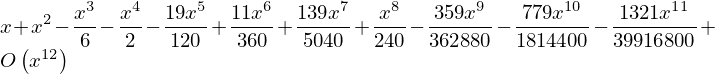

In [46]:
series(sin(x)*cos(x)*exp(x), x, 0, 12)

### Linear algebra: Matrices

In [47]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

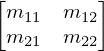

In [48]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [49]:
b = Matrix([[b1], [b2]])
b

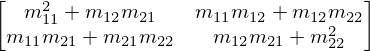

In [50]:
A**2

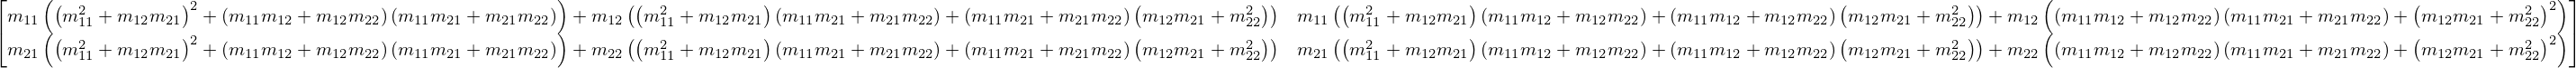

In [51]:
A**5

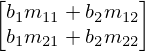

In [52]:
A * b

In [53]:
A.det()

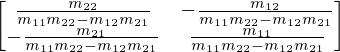

In [54]:
A.inv()

### Solving equations
Solving 
$$ x^2 - 1 = 0,\quad x^4 - x^2 - 1 = 0$$

In [55]:
solve(x**2 - 1, x)

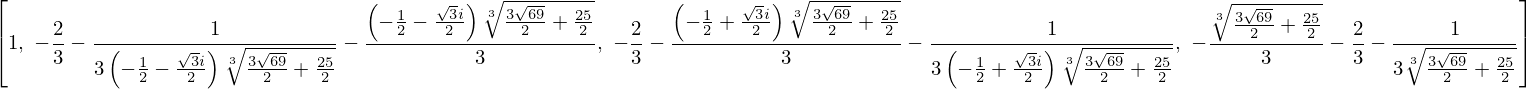

In [56]:
solve(x**4 + x**3 - x**2 - 1, x)

Solving systems:
$$ x + y - 1 = 0,\quad x - y - 1 = 0,$$
and
$$ x + y - a = 0,\quad x - y - b = 0.$$

In [57]:
solve([x + y - 1, x - y - 1], [x,y])

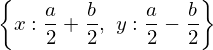

In [58]:
a, b = symbols('a, b')
solve([x + y - a, x - y - b], [x,y])